<a href="https://colab.research.google.com/github/kerllare/Analise_dados_olist/blob/main/Atividade_de_Modelos_de_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Log%C3%ADstica_Kerlla_Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn):
Exemplo de como fazer a importação do dataset usando o sklearn
from sklearn import datasets
iris = datasets.load_iris()


Responda:


a. Faça uma análise inicial sobre esse dataset


In [ ]:
#importe as bibliotecas necessárias
import pandas as pd
from sklearn import datasets

#carregando o dataset iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

#exibindo as primeiras linhas do dataset
print(iris_df.head())

#descrição do dataset
print(iris_df.describe())

#verificando a distribuição das classes
print(iris_df['species'].value_counts())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes

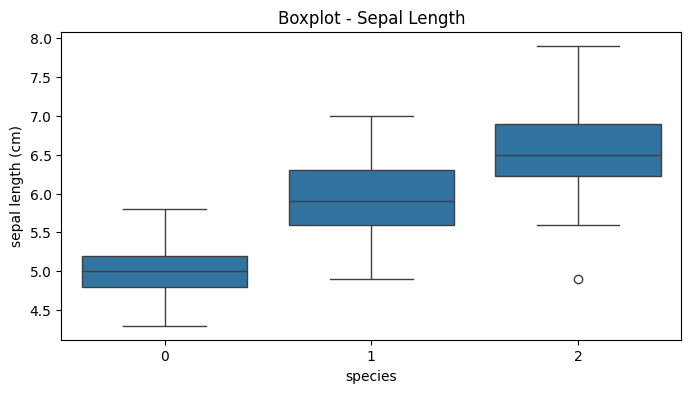

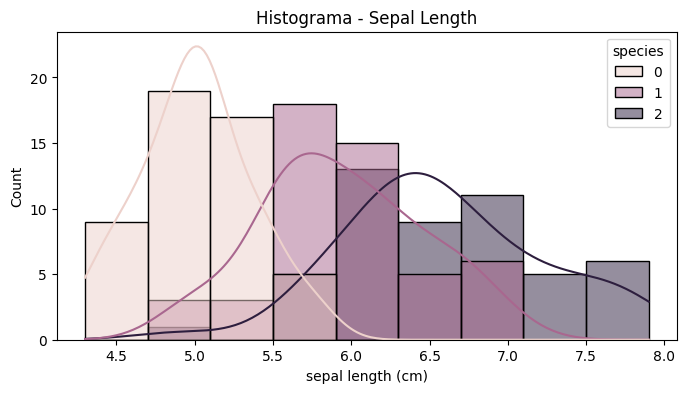

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Boxplot - Sepal Length')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data=iris_df, x='sepal length (cm)', hue='species', kde=True)
plt.title('Histograma - Sepal Length')
plt.show()


c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?

R:  Observando os gráficos, é possível perceber que algumas propriedades, como petal length (cm) e petal width (cm), têm uma separação mais clara entre as espécies. Já sepal length (cm) e sepal width (cm) apresentam mais sobreposição entre as classes.

d. Aplique a regressão logística para avaliar o modelo de
classificação.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

#definindo variáveis independentes e dependente
X = iris_df.drop(columns=['species'])
y = iris_df['species']

#dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#treinando o modelo de regressão logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

#prevendo nos dados de teste
y_pred = model.predict(X_test)

#relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



e. Calcule a acurácia, precisão e recall

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")


Acurácia: 1.0
Precisão: 1.0
Recall: 1.0


f. Plote a matriz de confusao com matplotlib ou seaborn

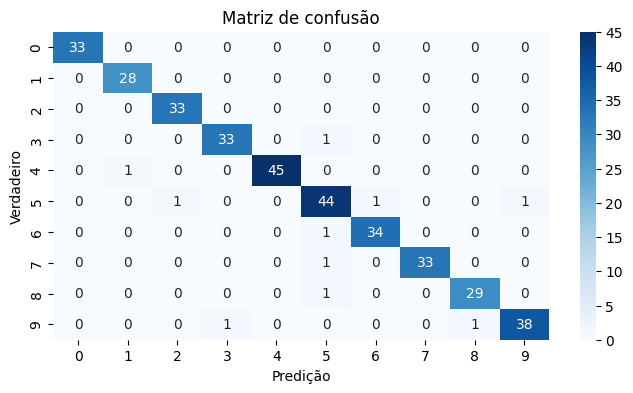

In [23]:
#matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusão')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.show()


2. Utilizando o dataset load_digits.

Responda:

a. Faça uma análise inicial sobre esse dataset

i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados categóricos?

b. Aplique a regressão logística para avaliar o modelo de classificação.

c. Calcule a acurácia, precisão e recall.

d. Plote a matriz de confusão com matplotlib ou seaborn

e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de
0-9 que são disponibilizados neste dataset.

f. Calcule a acurácia, precisão e recall.

g. Plote a matriz de confusao com matplotlib ou seaborn

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()


In [ ]:
#carregando o dataset digits
digits = load_digits()
digits_df = pd.DataFrame(data=digits.data)
digits_df['target'] = digits.target

#primeiras linhas do dataset
print(digits_df.head())

#descrição do dataset
print(digits_df.describe())

#verificando a distribuição das classes
print(digits_df['target'].value_counts())

#quantos dados possui
print(f"Número de dados: {digits.data.shape[0]}")

#existem dados nulos? Se sim, quantos?
print(f"Número de dados nulos: {digits_df.isnull().sum().sum()}")

#todos são dados numéricos ou existem colunas com dados categóricos?
print(digits_df.dtypes)


     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]
            0            1            2            3            4  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     

In [ ]:
#definindo variáveis independentes e dependente
X = digits_df.drop(columns=['target'])
y = digits_df['target']

#dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#treinando o modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#prevendo nos dados de teste
y_pred = model.predict(X_test)

#relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")


Acurácia: 0.9722222222222222
Precisão: 0.9725599634194969
Recall: 0.9722222222222222


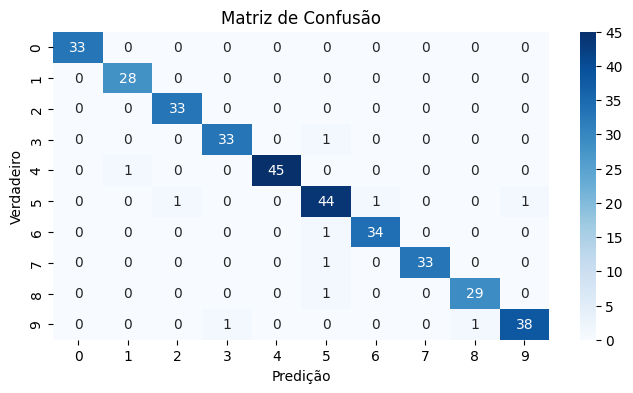

In [ ]:
#plotar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

#inicializando e treinando o modelo de regressão logística
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

#prevendo nos dados de teste
y_pred = logistic_model.predict(X_test)


In [ ]:
#calculando acurácia, precisão e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")

#relatório de classificação completo
print("Relatório de classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9722222222222222
Precisão: 0.9725599634194969
Recall: 0.9722222222222222
Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



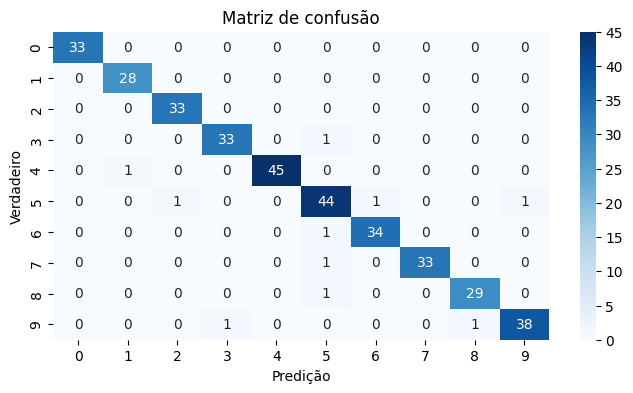

In [ ]:
#calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

#plotando a matriz de confusão
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusão')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.show()


A matriz de confusão mostra que o modelo é bom em reconhecer os dígitos escritos à mão, acertando a maioria das vezes. No entanto, ver onde ele erra pode ajudar a tornar o modelo ainda melhor.